In [1]:
import pandas as pd
import geopandas as gpd
#truck routes
ct = gpd.read_file('census.geojson')
ct

,ntacode,ntaname,boro_name,boro_code,ctlabel,geometry
0,SI22,West New Brighton-New Brighton-St. George,Staten Island,5,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,Turtle Bay-East Midtown,Manhattan,1,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN17,Midtown-Midtown South,Manhattan,1,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
3,MN17,Midtown-Midtown South,Manhattan,1,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
4,MN17,Midtown-Midtown South,Manhattan,1,113,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ..."
...,...,...,...,...,...,...
2160,MN01,Marble Hill-Inwood,Manhattan,1,299,"MULTIPOLYGON (((-73.92234 40.85568, -73.92234 ..."
2161,MN99,park-cemetery-etc-Manhattan,Manhattan,1,311,"MULTIPOLYGON (((-73.92234 40.85568, -73.92230 ..."
2162,MN06,Manhattanville,Manhattan,1,223.02,"MULTIPOLYGON (((-73.95556 40.81943, -73.95602 ..."
2163,MN19,Turtle Bay-East Midtown,Manhattan,1,86.02,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ..."


In [2]:
ss = gpd.read_file('sel_streets_2.geojson')
ss.head(3)

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,midday,afternoon_rush,evening,night,total,year,month,day,ClosedIndicator,geometry
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,2489.0,2229,1486.0,711.0,8097.0,2014,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980..."
1,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,1897.0,1444,1097.0,585.0,6211.0,2014,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980..."
2,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,1274.0,903,726.0,336.0,3978.0,2014,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980..."


In [3]:
streets_with_ct = gpd.sjoin(ss, ct, how="left", op='intersects')
streets_with_ct.head()

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,month,day,ClosedIndicator,geometry,index_right,ntacode,ntaname,boro_name,boro_code,ctlabel
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1006,BX22,North Riverdale-Fieldston-Riverdale,Bronx,2,351
1,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285
1,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1006,BX22,North Riverdale-Fieldston-Riverdale,Bronx,2,351
2,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285


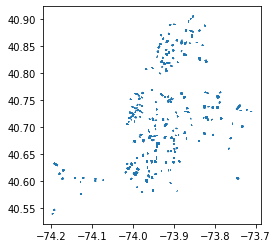

In [4]:
streets_with_ct.plot()

In [5]:
streets_with_ct = pd.DataFrame(streets_with_ct)
streets_with_ct

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,month,day,ClosedIndicator,geometry,index_right,ntacode,ntaname,boro_name,boro_code,ctlabel
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1006,BX22,North Riverdale-Fieldston-Riverdale,Bronx,2,351
1,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285
1,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1006,BX22,North Riverdale-Fieldston-Riverdale,Bronx,2,351
2,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,9,13,0,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,10,6,1,"MULTILINESTRING ((-73.96127 40.68052, -73.9582...",911,BK69,Clinton Hill,Brooklyn,3,201
10592,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,10,6,1,"MULTILINESTRING ((-73.96127 40.68052, -73.9582...",50,BK69,Clinton Hill,Brooklyn,3,227
10592,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,10,6,1,"MULTILINESTRING ((-73.96127 40.68052, -73.9582...",911,BK69,Clinton Hill,Brooklyn,3,201
10593,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,10,6,1,"MULTILINESTRING ((-73.96127 40.68052, -73.9582...",50,BK69,Clinton Hill,Brooklyn,3,227


In [6]:
streets_with_ct['unique_id'] = range(len(streets_with_ct))
streets_with_ct['unique_id']

0            0
0            1
1            2
1            3
2            4
         ...  
10591    17188
10592    17189
10592    17190
10593    17191
10593    17192
Name: unique_id, Length: 17193, dtype: int64

In [7]:
t=streets_with_ct[['unique_id','ctlabel','morning_rush','Date']]

In [8]:
#morning surrounding streets traffic
results = []
grouped = t.groupby(['ctlabel','Date'])
for key, group in grouped:
    for idx, row in group.iterrows():
        # The group excluding current row
        group_other = group.drop(idx)  
        sum_tots = group_other['morning_rush'].sum()
        results.append(row.tolist() + [sum_tots])
        
results_df = pd.DataFrame(
    results, columns=['unique_id','ctlabel', 'morning_rush', 'Date','sum_total_morning']
)
results_df

,unique_id,ctlabel,morning_rush,Date,sum_total_morning
0,5463,1006,985.0,2014-11-01,2435.0
1,5465,1006,899.0,2014-11-01,2521.0
2,5468,1006,1356.0,2014-11-01,2064.0
3,5470,1006,180.0,2014-11-01,3240.0
4,5473,1006,1116.0,2014-11-02,5419.0
...,...,...,...,...,...
17188,5529,994,945.0,2014-11-07,376.0
17189,5534,994,1705.0,2014-11-08,1094.0
17190,5539,994,1094.0,2014-11-08,1705.0
17191,5544,994,885.0,2014-11-09,1921.0


In [9]:
test = streets_with_ct.merge(results_df, how='left', on=['unique_id','ctlabel','morning_rush'])
test

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date_x,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,geometry,index_right,ntacode,ntaname,boro_name,boro_code,ctlabel,unique_id,Date_y,sum_total_morning
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285,0,2014-09-13,1927.0
1,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1006,BX22,North Riverdale-Fieldston-Riverdale,Bronx,2,351,1,2014-09-13,1927.0
2,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285,2,2014-09-13,1921.0
3,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1006,BX22,North Riverdale-Fieldston-Riverdale,Bronx,2,351,3,2014-09-13,1921.0
4,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,"MULTILINESTRING ((-73.89846 40.88948, -73.8980...",1834,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285,4,2014-09-13,2370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17188,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,"MULTILINESTRING ((-73.96127 40.68052, -73.9582...",911,BK69,Clinton Hill,Brooklyn,3,201,17188,2019-10-06,24912.0
17189,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,"MULTILINESTRING ((-73.96127 40.68052, -73.9582...",50,BK69,Clinton Hill,Brooklyn,3,227,17189,2019-10-06,62667.0
17190,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,"MULTILINESTRING ((-73.96127 40.68052, -73.9582...",911,BK69,Clinton Hill,Brooklyn,3,201,17190,2019-10-06,24912.0
17191,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,"MULTILINESTRING ((-73.96127 40.68052, -73.9582...",50,BK69,Clinton Hill,Brooklyn,3,227,17191,2019-10-06,62667.0


In [10]:
t=streets_with_ct[['unique_id','ctlabel','midday','Date']]

In [11]:
#midday traffic
results = []
grouped = t.groupby(['ctlabel','Date'])
for key, group in grouped:
    for idx, row in group.iterrows():
        # The group excluding current row
        group_other = group.drop(idx)  
        sum_tots = group_other['midday'].sum()
        results.append(row.tolist() + [sum_tots])
        
results_df = pd.DataFrame(
    results, columns=['unique_id','ctlabel', 'midday', 'Date','sum_total_midday']
)
results_df

,unique_id,ctlabel,midday,Date,sum_total_midday
0,5463,1006,3312.0,2014-11-01,5520.0
1,5465,1006,2266.0,2014-11-01,6566.0
2,5468,1006,2761.0,2014-11-01,6071.0
3,5470,1006,493.0,2014-11-01,8339.0
4,5473,1006,2948.0,2014-11-02,10564.0
...,...,...,...,...,...
17188,5529,994,2501.0,2014-11-07,579.0
17189,5534,994,2591.0,2014-11-08,1333.0
17190,5539,994,1333.0,2014-11-08,2591.0
17191,5544,994,1921.0,2014-11-09,4213.0


In [12]:
test = test.merge(results_df, how='left', on=['unique_id','ctlabel','midday'])
test

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date_x,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,ntacode,ntaname,boro_name,boro_code,ctlabel,unique_id,Date_y,sum_total_morning,Date,sum_total_midday
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285,0,2014-09-13,1927.0,2014-09-13,3171.0
1,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,BX22,North Riverdale-Fieldston-Riverdale,Bronx,2,351,1,2014-09-13,1927.0,2014-09-13,3171.0
2,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285,2,2014-09-13,1921.0,2014-09-13,3763.0
3,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,BX22,North Riverdale-Fieldston-Riverdale,Bronx,2,351,3,2014-09-13,1921.0,2014-09-13,3763.0
4,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,BX29,Spuyten Duyvil-Kingsbridge,Bronx,2,285,4,2014-09-13,2370.0,2014-09-13,4386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17188,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,BK69,Clinton Hill,Brooklyn,3,201,17188,2019-10-06,24912.0,2019-10-06,33345.0
17189,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,BK69,Clinton Hill,Brooklyn,3,227,17189,2019-10-06,62667.0,2019-10-06,72470.0
17190,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,BK69,Clinton Hill,Brooklyn,3,201,17190,2019-10-06,24912.0,2019-10-06,33345.0
17191,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,BK69,Clinton Hill,Brooklyn,3,227,17191,2019-10-06,62667.0,2019-10-06,72470.0


In [13]:
t=streets_with_ct[['unique_id','ctlabel','afternoon_rush','Date']]

In [14]:
#midday traffic
results = []
grouped = t.groupby(['ctlabel','Date'])
for key, group in grouped:
    for idx, row in group.iterrows():
        # The group excluding current row
        group_other = group.drop(idx)  
        sum_tots = group_other['afternoon_rush'].sum()
        results.append(row.tolist() + [sum_tots])
        
results_df = pd.DataFrame(
    results, columns=['unique_id','ctlabel', 'afternoon_rush', 'Date','sum_total_afternoon_rush']
)
results_df

,unique_id,ctlabel,afternoon_rush,Date,sum_total_afternoon_rush
0,5463,1006,3411,2014-11-01,4910
1,5465,1006,2261,2014-11-01,6060
2,5468,1006,2013,2014-11-01,6308
3,5470,1006,636,2014-11-01,7685
4,5473,1006,3888,2014-11-02,8457
...,...,...,...,...,...
17188,5529,994,2185,2014-11-07,423
17189,5534,994,1963,2014-11-08,2352
17190,5539,994,2352,2014-11-08,1963
17191,5544,994,1494,2014-11-09,3121


In [15]:
test = test.merge(results_df, how='left', on=['unique_id','ctlabel','afternoon_rush'])
test

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date_x,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,boro_name,boro_code,ctlabel,unique_id,Date_y,sum_total_morning,Date_x,sum_total_midday,Date_y,sum_total_afternoon_rush
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,Bronx,2,285,0,2014-09-13,1927.0,2014-09-13,3171.0,2014-09-13,2347
1,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,Bronx,2,351,1,2014-09-13,1927.0,2014-09-13,3171.0,2014-09-13,2347
2,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,Bronx,2,285,2,2014-09-13,1921.0,2014-09-13,3763.0,2014-09-13,3132
3,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,Bronx,2,351,3,2014-09-13,1921.0,2014-09-13,3763.0,2014-09-13,3132
4,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,Bronx,2,285,4,2014-09-13,2370.0,2014-09-13,4386.0,2014-09-13,3673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17188,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,Brooklyn,3,201,17188,2019-10-06,24912.0,2019-10-06,33345.0,2019-10-06,35946
17189,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,Brooklyn,3,227,17189,2019-10-06,62667.0,2019-10-06,72470.0,2019-10-06,70298
17190,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,Brooklyn,3,201,17190,2019-10-06,24912.0,2019-10-06,33345.0,2019-10-06,35946
17191,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,Brooklyn,3,227,17191,2019-10-06,62667.0,2019-10-06,72470.0,2019-10-06,70298


In [16]:
t=streets_with_ct[['unique_id','ctlabel','evening','Date']]

In [17]:
#evening traffic
results = []
grouped = t.groupby(['ctlabel','Date'])
for key, group in grouped:
    for idx, row in group.iterrows():
        # The group excluding current row
        group_other = group.drop(idx)  
        sum_tots = group_other['evening'].sum()
        results.append(row.tolist() + [sum_tots])
        
results_df = pd.DataFrame(
    results, columns=['unique_id','ctlabel', 'evening', 'Date','sum_total_evening']
)
results_df

,unique_id,ctlabel,evening,Date,sum_total_evening
0,5463,1006,1837.0,2014-11-01,3051.0
1,5465,1006,1527.0,2014-11-01,3361.0
2,5468,1006,1156.0,2014-11-01,3732.0
3,5470,1006,368.0,2014-11-01,4520.0
4,5473,1006,2168.0,2014-11-02,5776.0
...,...,...,...,...,...
17188,5529,994,1117.0,2014-11-07,324.0
17189,5534,994,1831.0,2014-11-08,2571.0
17190,5539,994,2571.0,2014-11-08,1831.0
17191,5544,994,1742.0,2014-11-09,2490.0


In [18]:
test = test.merge(results_df, how='left', on=['unique_id','ctlabel','evening'])
test

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date_x,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,ctlabel,unique_id,Date_y,sum_total_morning,Date_x,sum_total_midday,Date_y,sum_total_afternoon_rush,Date,sum_total_evening
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,285,0,2014-09-13,1927.0,2014-09-13,3171.0,2014-09-13,2347,2014-09-13,1823.0
1,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,351,1,2014-09-13,1927.0,2014-09-13,3171.0,2014-09-13,2347,2014-09-13,1823.0
2,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,285,2,2014-09-13,1921.0,2014-09-13,3763.0,2014-09-13,3132,2014-09-13,2212.0
3,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,351,3,2014-09-13,1921.0,2014-09-13,3763.0,2014-09-13,3132,2014-09-13,2212.0
4,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,285,4,2014-09-13,2370.0,2014-09-13,4386.0,2014-09-13,3673,2014-09-13,2583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17188,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,201,17188,2019-10-06,24912.0,2019-10-06,33345.0,2019-10-06,35946,2019-10-06,18702.0
17189,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,227,17189,2019-10-06,62667.0,2019-10-06,72470.0,2019-10-06,70298,2019-10-06,25936.0
17190,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,201,17190,2019-10-06,24912.0,2019-10-06,33345.0,2019-10-06,35946,2019-10-06,18702.0
17191,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,227,17191,2019-10-06,62667.0,2019-10-06,72470.0,2019-10-06,70298,2019-10-06,25936.0


In [19]:
t=streets_with_ct[['unique_id','ctlabel','night','Date']]

In [20]:
#evening traffic
results = []
grouped = t.groupby(['ctlabel','Date'])
for key, group in grouped:
    for idx, row in group.iterrows():
        # The group excluding current row
        group_other = group.drop(idx)  
        sum_tots = group_other['night'].sum()
        results.append(row.tolist() + [sum_tots])
        
results_df = pd.DataFrame(
    results, columns=['unique_id','ctlabel', 'night', 'Date','sum_total_night']
)
results_df

,unique_id,ctlabel,night,Date,sum_total_night
0,5463,1006,684.0,2014-11-01,1242.0
1,5465,1006,681.0,2014-11-01,1245.0
2,5468,1006,392.0,2014-11-01,1534.0
3,5470,1006,169.0,2014-11-01,1757.0
4,5473,1006,669.0,2014-11-02,1832.0
...,...,...,...,...,...
17188,5529,994,249.0,2014-11-07,90.0
17189,5534,994,1152.0,2014-11-08,1156.0
17190,5539,994,1156.0,2014-11-08,1152.0
17191,5544,994,1371.0,2014-11-09,1097.0


In [21]:
test = test.merge(results_df, how='left', on=['unique_id','ctlabel','night'])
test

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date_x,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,Date_y,sum_total_morning,Date_x,sum_total_midday,Date_y,sum_total_afternoon_rush,Date_x,sum_total_evening,Date_y,sum_total_night
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,2014-09-13,1927.0,2014-09-13,3171.0,2014-09-13,2347,2014-09-13,1823.0,2014-09-13,921.0
1,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,2014-09-13,1927.0,2014-09-13,3171.0,2014-09-13,2347,2014-09-13,1823.0,2014-09-13,921.0
2,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,2014-09-13,1921.0,2014-09-13,3763.0,2014-09-13,3132,2014-09-13,2212.0,2014-09-13,1047.0
3,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,2014-09-13,1921.0,2014-09-13,3763.0,2014-09-13,3132,2014-09-13,2212.0,2014-09-13,1047.0
4,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,2014-09-13,2370.0,2014-09-13,4386.0,2014-09-13,3673,2014-09-13,2583.0,2014-09-13,1296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17188,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,2019-10-06,24912.0,2019-10-06,33345.0,2019-10-06,35946,2019-10-06,18702.0,2019-10-06,4572.0
17189,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,2019-10-06,62667.0,2019-10-06,72470.0,2019-10-06,70298,2019-10-06,25936.0,2019-10-06,9852.0
17190,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,2019-10-06,24912.0,2019-10-06,33345.0,2019-10-06,35946,2019-10-06,18702.0,2019-10-06,4572.0
17191,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,2019-10-06,62667.0,2019-10-06,72470.0,2019-10-06,70298,2019-10-06,25936.0,2019-10-06,9852.0


In [22]:
test = test.loc[:,~test.columns.duplicated()]
test

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date_x,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,boro_name,boro_code,ctlabel,unique_id,Date_y,sum_total_morning,sum_total_midday,sum_total_afternoon_rush,sum_total_evening,sum_total_night
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,Bronx,2,285,0,2014-09-13,1927.0,3171.0,2347,1823.0,921.0
1,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,Bronx,2,351,1,2014-09-13,1927.0,3171.0,2347,1823.0,921.0
2,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,Bronx,2,285,2,2014-09-13,1921.0,3763.0,3132,2212.0,1047.0
3,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,Bronx,2,351,3,2014-09-13,1921.0,3763.0,3132,2212.0,1047.0
4,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,Bronx,2,285,4,2014-09-13,2370.0,4386.0,3673,2583.0,1296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17188,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,Brooklyn,3,201,17188,2019-10-06,24912.0,33345.0,35946,18702.0,4572.0
17189,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,Brooklyn,3,227,17189,2019-10-06,62667.0,72470.0,70298,25936.0,9852.0
17190,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,Brooklyn,3,201,17190,2019-10-06,24912.0,33345.0,35946,18702.0,4572.0
17191,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,Brooklyn,3,227,17191,2019-10-06,62667.0,72470.0,70298,25936.0,9852.0


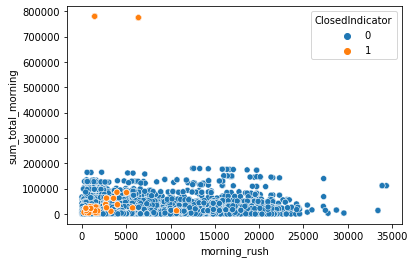

In [23]:
import seaborn as sns
sns.scatterplot(x=test['morning_rush'], y=test['sum_total_morning'], hue=test['ClosedIndicator'])

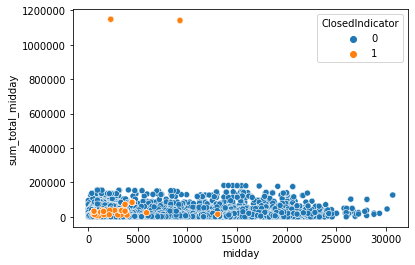

In [24]:
import seaborn as sns
sns.scatterplot(x=test['midday'], y=test['sum_total_midday'], hue=test['ClosedIndicator'])

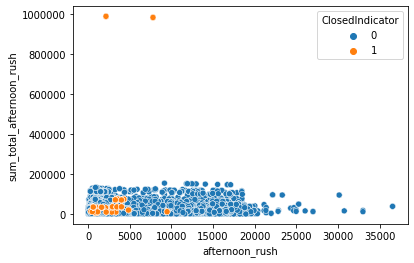

In [25]:
import seaborn as sns
sns.scatterplot(x=test['afternoon_rush'], y=test['sum_total_afternoon_rush'], hue=test['ClosedIndicator'])

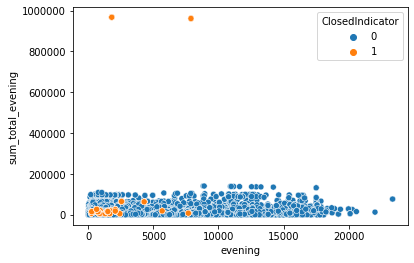

In [26]:
import seaborn as sns
sns.scatterplot(x=test['evening'], y=test['sum_total_evening'], hue=test['ClosedIndicator'])

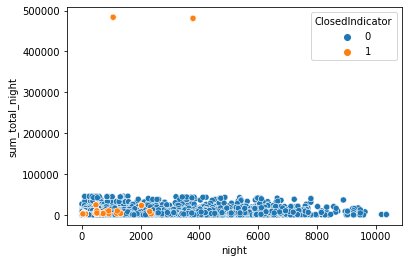

In [27]:
import seaborn as sns
sns.scatterplot(x=test['night'], y=test['sum_total_night'], hue=test['ClosedIndicator'])

In [30]:
test = test.drop(columns =['Date_y','Date_y','Date_x'])

In [33]:
test = test.drop(columns =['To_y'])

In [34]:
test = test.rename(columns={
    'To_x':'To'})

In [31]:
test = test.rename(columns={
    'From_x':'From',
    'roadway_name_x':'roadway_name'
})

In [35]:
test.dtypes

ID                             int64
Segment ID                     int64
roadway_name                  object
From                          object
To                            object
Direction                     object
12:00-1:00 AM                float64
1:00-2:00AM                  float64
2:00-3:00AM                  float64
3:00-4:00AM                  float64
4:00-5:00AM                  float64
5:00-6:00AM                  float64
6:00-7:00AM                  float64
7:00-8:00AM                  float64
8:00-9:00AM                  float64
9:00-10:00AM                 float64
10:00-11:00AM                float64
11:00-12:00PM                float64
12:00-1:00PM                   int64
1:00-2:00PM                    int64
2:00-3:00PM                    int64
3:00-4:00PM                    int64
4:00-5:00PM                    int64
5:00-6:00PM                    int64
6:00-7:00PM                    int64
7:00-8:00PM                    int64
8:00-9:00PM                    int64
9

In [29]:
#small_df = test[1000:1020]

In [30]:
#small_df.plot(x="unique_id", y=["sum_total_morning", "sum_total_mmidday", "sum_total_afternoon_rush"], kind="bar")

In [36]:
geo = gpd.GeoDataFrame(test, geometry='geometry')
geo.to_file("fixed_data2.geojson", driver='GeoJSON')